<a href="https://colab.research.google.com/github/gustavol3ma/Learning_journey/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classificação Linear**

equação da reta

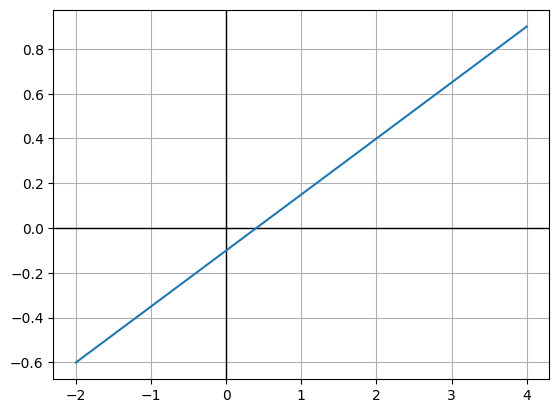

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = -1
b = 4
c = 0.4
def plotline(a,b,c):
  x = np.linspace(-2,4,50)
  y = (-a*x -c)/b

  plt.axvline(0,-1,1, color = 'k' , linewidth=1)
  plt.axhline(0,-2,4, color = 'k' , linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

plotline(a,b,c)


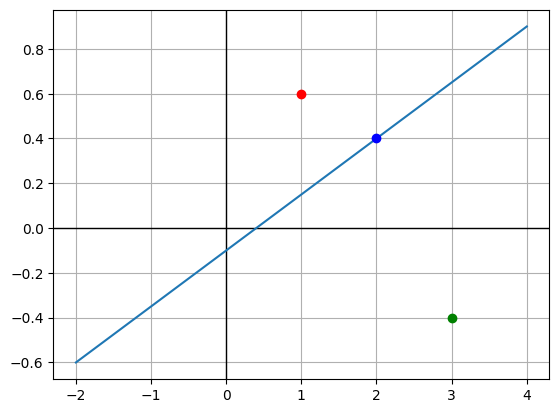

In [2]:
p1 = (2,0.4)
p2 = (1,0.6)
p3 = (3,-0.4)

ret1 = a*p1[0]+b*p1[1]+c
ret2 = a*p2[0]+b*p2[1]+c
ret3 = a*p3[0]+b*p3[1]+c

plotline(a,b,c)
plt.plot(p1[0],p1[1],color = 'b', marker = 'o')
plt.plot(p2[0],p2[1],color = 'r', marker = 'o')
plt.plot(p3[0],p3[1],color = 'g', marker = 'o')

In [3]:
print('%f' % ret1)
print('%f' % ret2)
print('%f' % ret3)

0.000000
1.800000
-4.200000


**Exercício sugerido**

1


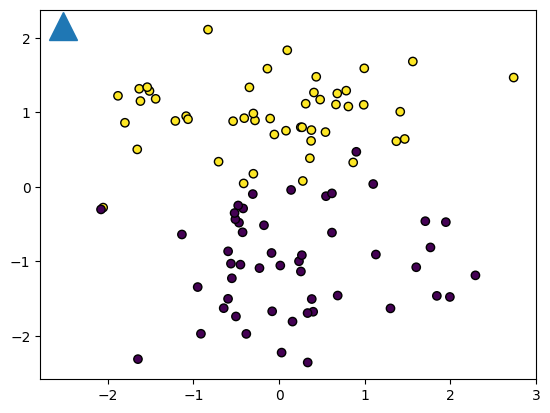

In [4]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X , Y = make_classification(n_features = 2, n_redundant = 0 , n_informative = 1,
                            n_clusters_per_class = 1)

plt.scatter(X[:, 0], X[:, 1 ] , marker = 'o', c=Y,
         edgecolor = 'k')

p = X[10]
print(Y[10])
plt.plot(p[0],p[1], marker = '^',markersize=20)

3


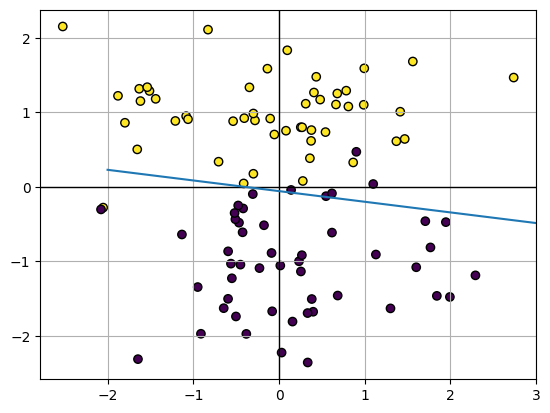

In [15]:
def plotmodel(w1,w2,b):
  x = np.linspace(-2,4,50)
  y = (-w1*x -c)/w2

  plt.scatter(X[:, 0], X[:, 1 ] , marker = 'o', c=Y,
         edgecolor = 'k')

  xmin , xmax = plt.gca().get_xlim()
  ymin , ymax = plt.gca().get_ylim()

  plt.axvline(0,-1,1, color = 'k' , linewidth=1)
  plt.axhline(0,-2,4, color = 'k' , linewidth=1)
  plt.plot(x,y)
  plt.grid(True)

  plt.xlim(xmin,xmax)
  plt.ylim(ymin,ymax)


w1 = 1
w2 = 7
b=-3
plotmodel(w1,w2,b)

p=(-1,1)
print(w1*p[0] + w2*p[1] + b)

0
blue


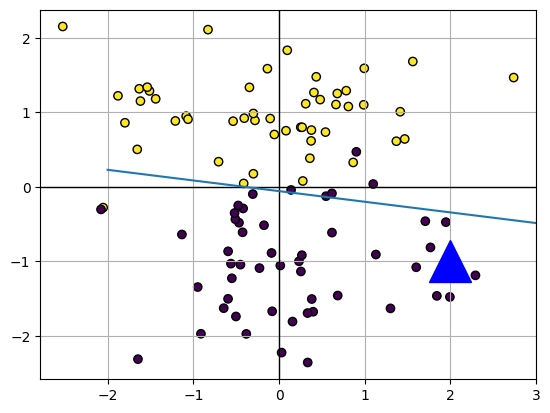

In [18]:
def classify(ponto , w1 , w2 , b):
  ret = w1* ponto[0] + w2*ponto[1] + b
  if ret >= 0:
    return 1 , 'yellow'
  else:
    return 0 , 'blue'

p = (2,-1)
classe, cor = classify(p,w1,w2,b)
print(classe)
print(cor)

plotmodel(w1,w2,b)
plt.plot(p[0], p[1], marker= '^', color= cor, markersize = 30)

In [23]:
acertos = 0
for k in range(len(X)):
  categ,_= classify(X[k],w1,w2,b)
  if categ == Y[k]:
    acertos += 1

print('Acurácia:{0}'.format(acertos/len(X)*100))

Acurácia:93.0


**Camada Linear**

In [34]:
import torch
from torch import nn # neural networks

torch.manual_seed(42)
perceptron = nn.Linear(in_features=3, out_features=1)

for nome , tensor in perceptron.named_parameters():
  print(nome,tensor.data)
  print('')
  print(perceptron.weight)
  print('')
  print(perceptron.bias)


weight tensor([[ 0.4414,  0.4792, -0.1353]])

Parameter containing:
tensor([[ 0.4414,  0.4792, -0.1353]], requires_grad=True)

Parameter containing:
tensor([0.5304], requires_grad=True)
bias tensor([0.5304])

Parameter containing:
tensor([[ 0.4414,  0.4792, -0.1353]], requires_grad=True)

Parameter containing:
tensor([0.5304], requires_grad=True)


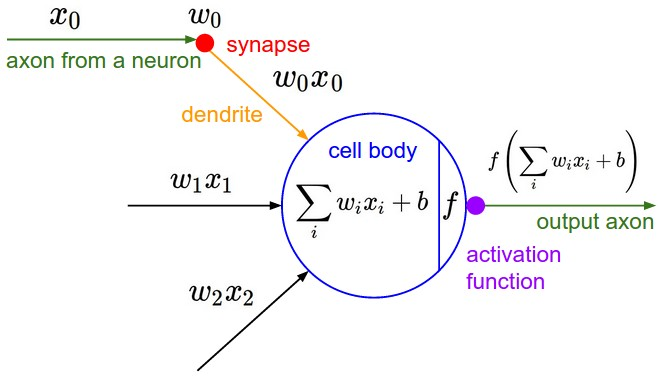

In [35]:
w1 , w2 , w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()[0]


#w1 * x1 + w2 * x2 + w3 * x3 +b = 0

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):

  w1, w2, w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()

  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1, X2 = np.meshgrid(X1,X2)

  X3 = (b - w1*X1 - w2*X2) / w3

  fig = plt.figure(figsize=(10, 8))

  ax = fig.add_subplot(111, projection='3d') # Corrected line
  ax.view_init(azim=180)

  ax.plot_surface(X1, X2, X3, cmap='plasma')

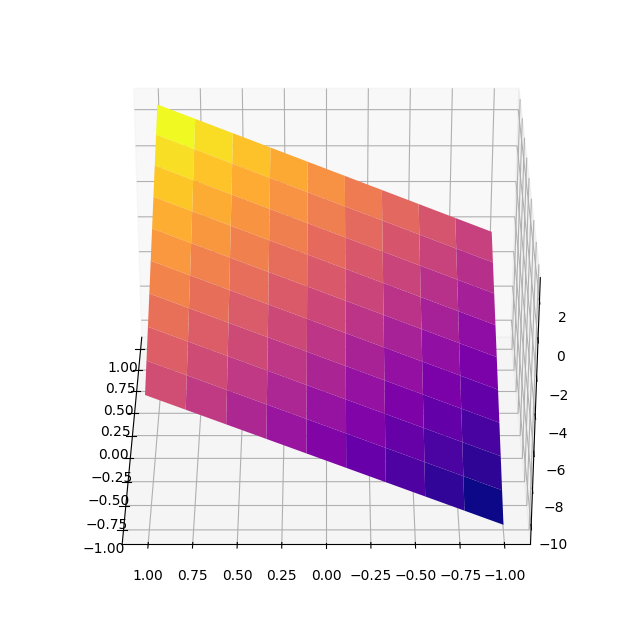

In [37]:
plot3d(perceptron)

tensor([-0.2194], grad_fn=<ViewBackward0>)


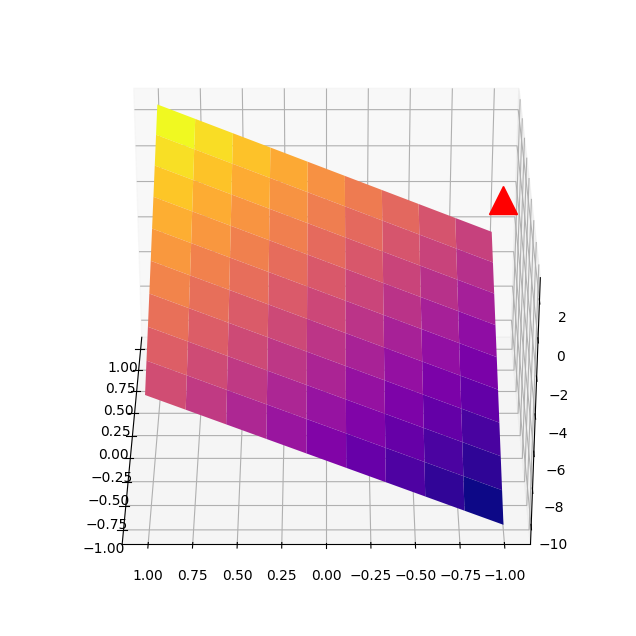

In [43]:
X = torch.Tensor([0 , -1 , 2 ])
Y = perceptron(X)

print(Y)

plot3d(perceptron)
plt.plot([X[0]],[X[1]],[X[2]] ,color= 'r', marker ='^' , markersize=20)